### Star Wars Survey

While waiting for <a href='https://en.wikipedia.org/wiki/Star_Wars:_The_Force_Awakens'>Star Wars: The Force Awakens</a> to come out, the team at <a href='http://fivethirtyeight.com/'>FiveThirtyEight</a> became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which can be downloaded from their <a href='https://github.com/fivethirtyeight/data/tree/master/star-wars-survey'> GitHub repository.</a>

The data has several columns, including the following:

- RespondentID — An anonymized ID for the respondent (person taking the survey)
- Gender — the respondent's gender
- Age — the respondent's age
- Household Income — the respondent's income
- Education — the respondent's education level
- Location (Census Region) — the respondent's location
- Have you seen any of the 6 films in the Star Wars franchise? — a Yes or No response
- Do you consider yourself to be a fan of the Star Wars film franchise? — a Yes or No response

There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in a column. As a result, this dataset needs a lot of cleaning.

In [56]:
#Importing necessary libraries 
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

In [2]:
#importing datasets
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [3]:
#Previewing the first ten rows of our data
star_wars.head(10)

RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0    3292879998                                                Yes             
1    3292879538                                                 No             
2    3292765271                                                Yes             
3    3292763116                                                Yes             
4    3292731220                                                Yes             
5    3292719380                                                Yes             
6    3292684787                                                Yes             
7    3292663732                                                Yes             
8    3292654043                                                Yes             
9    3292640424                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                                Yes                      
1                                                NaN                      
2                                                 No                      
3                                                Yes                      
4                                                Yes                      
5                                                Yes                      
6                                                Yes                      
7                                                Yes                      
8                                                Yes                      
9                                                 No                      

  Which of the following Star Wars films have you seen? Please select all that apply.  \
0           Star Wars: Episode I  The Phantom Menace                                    
1                                                NaN                                    
2           Star Wars: Episode I  The Phantom Menace                                    
3           Star Wars: Episode I  The Phantom Menace                                    
4           Star Wars: Episode I  The Phantom Menace                                    
5           Star Wars: Episode I  The Phantom Menace                                    
6           Star Wars: Episode I  The Phantom Menace                                    
7           Star Wars: Episode I  The Phantom Menace                                    
8           Star Wars: Episode I  The Phantom Menace                                    
9                                                NaN                                    

                                    Unnamed: 4  \
0  Star Wars: Episode II  Attack of the Clones   
1                                          NaN   
2  Star Wars: Episode II  Attack of the Clones   
3  Star Wars: Episode II  Attack of the Clones   
4  Star Wars: Episode II  Attack of the Clones   
5  Star Wars: Episode II  Attack of the Clones   
6  Star Wars: Episode II  Attack of the Clones   
7  Star Wars: Episode II  Attack of the Clones   
8  Star Wars: Episode II  Attack of the Clones   
9  Star Wars: Episode II  Attack of the Clones   

                                    Unnamed: 5  \
0  Star Wars: Episode III  Revenge of the Sith   
1                                          NaN   
2  Star Wars: Episode III  Revenge of the Sith   
3  Star Wars: Episode III  Revenge of the Sith   
4  Star Wars: Episode III  Revenge of the Sith   
5  Star Wars: Episode III  Revenge of the Sith   
6  Star Wars: Episode III  Revenge of the Sith   
7  Star Wars: Episode III  Revenge of the Sith   
8  Star Wars: Episode III  Revenge of the Sith   
9                                          NaN   

                          Unnamed: 6  \
0  Star Wars: Episode IV  A New Hope   
1                                NaN   
2                                NaN   
3  Star Wars: Episode IV  A New Hope   
4  Star Wars: 

In [4]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

## Cleaning and Mapping Yes/No Columns

Taking a look at the next two columns:

- Have you seen any of the 6 films in the Star Wars franchise?
- Do you consider yourself to be a fan of the Star Wars film franchise?

Both represent `Yes/No` questions. They can also be NaN where a respondent chooses not to answer a question.

In [5]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [6]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

Both columns are currently string types, because the main values they contain are `Yes and No`. Making the data a bit easier to analyze by converting each column to a Boolean with only the values `True, False, and NaN`. Booleans are easier to work with because we can select the rows that are `True or False` without having to do a string comparison.

In [7]:
yes_no = {
    "Yes": True,
    "No": False
}

In [8]:
for col in [
    "Have you seen any of the 6 films in the Star Wars franchise?",
    "Do you consider yourself to be a fan of the Star Wars film franchise?"
    ]:
    star_wars[col] = star_wars[col].map(yes_no)

star_wars.head()

RespondentID  Have you seen any of the 6 films in the Star Wars franchise?  \
0    3292879998                                               True              
1    3292879538                                              False              
2    3292765271                                               True              
3    3292763116                                               True              
4    3292731220                                               True              

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                               True                      
1                                                NaN                      
2                                              False                      
3                                               True                      
4                                               True                      

  Which of the following Star Wars films have you seen? Please select all that apply.  \
0           Star Wars: Episode I  The Phantom Menace                                    
1                                                NaN                                    
2           Star Wars: Episode I  The Phantom Menace                                    
3           Star Wars: Episode I  The Phantom Menace                                    
4           Star Wars: Episode I  The Phantom Menace                                    

                                    Unnamed: 4  \
0  Star Wars: Episode II  Attack of the Clones   
1                                          NaN   
2  Star Wars: Episode II  Attack of the Clones   
3  Star Wars: Episode II  Attack of the Clones   
4  Star Wars: Episode II  Attack of the Clones   

                                    Unnamed: 5  \
0  Star Wars: Episode III  Revenge of the Sith   
1                                          NaN   
2  Star Wars: Episode III  Revenge of the Sith   
3  Star Wars: Episode III  Revenge of the Sith   
4  Star Wars: Episode III  Revenge of the Sith   

                          Unnamed: 6  \
0  Star Wars: Episode IV  A New Hope   
1                                NaN   
2                                NaN   
3  Star Wars: Episode IV  A New Hope   
4  Star Wars: Episode IV  A New Hope   

                                     Unnamed: 7  \
0  Star Wars: Episode V The Empire Strikes Back   
1                                           NaN   
2                                           NaN   
3  Star Wars: Episode V The Empire Strikes Back   
4  Star Wars: Episode V The Empire Strikes Back   

                                 Unnamed: 8  \
0  Star Wars: Episode VI Return of the Jedi   
1                                       NaN   
2                                       NaN   
3  Star Wars: Episode VI Return of the Jedi   
4  Star Wars: Episode VI Return of the Jedi   

   Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.  \
0                                                3.0                                                                                               
1                                                NaN                                                                                               
2                                                1.0                                                                                               
3                                                5.0                                                                                               
4                                                5.0                                                                                               

   ...         Unnamed: 28       Which character shot first?  \
0  ...      Very favorably  I don't understand this question   
1  ...                 NaN                               NaN   
2  ...    Unfami

In [9]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [10]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

# Cleaning and Mapping Checkbox Columns

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, `Which of the following Star Wars films have you seen? Please select all that apply.`

The columns for this question are:

- `Which of the following Star Wars films have you seen? Please select all that apply.` — whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
- `Unnamed: 4` — whether or not the respondent saw `Star Wars: Episode II Attack of the Clones.`
- `Unnamed: 5` — whether or not the respondent saw `Star Wars: Episode III Revenge of the Sith.`
- `Unnamed: 6` — whether or not the respondent saw `Star Wars: Episode IV A New Hope.`
- `Unnamed: 7` — whether or not the respondent saw `Star Wars: Episode V The Empire Strikes Back.`
- `Unnamed: 8` — whether or not the respondent saw `Star Wars: Episode VI Return of the Jedi.`


For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is `NaN`, the respondent either didn't answer or didn't see the movie. it's best to assume that they didn't see the movie.

Each of these columns are converted to a Boolean, then the column was renamed to something more intuitive.

In [11]:
movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)

Next, The columns was renamed to reflect what they represent

In [12]:
star_wars = star_wars.rename(columns={
        "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6"
        })

star_wars.head()

RespondentID  Have you seen any of the 6 films in the Star Wars franchise?  \
0    3292879998                                               True              
1    3292879538                                              False              
2    3292765271                                               True              
3    3292763116                                               True              
4    3292731220                                               True              

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                               True                      
1                                                NaN                      
2                                              False                      
3                                               True                      
4                                               True                      

   seen_1  seen_2  seen_3  seen_4  seen_5  seen_6  \
0    True    True    True    True    True    True   
1   False   False   False   False   False   False   
2    True    True    True   False   False   False   
3    True    True    True    True    True    True   
4    True    True    True    True    True    True   

   Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.  \
0                                                3.0                                                                                               
1                                                NaN                                                                                               
2                                                1.0                                                                                               
3                                                5.0                                                                                               
4                                                5.0                                                                                               

   ...         Unnamed: 28       Which character shot first?  \
0  ...      Very favorably  I don't understand this question   
1  ...                 NaN                               NaN   
2  ...    Unfamiliar (N/A)  I don't understand this question   
3  ...      Very favorably  I don't understand this question   
4  ...  Somewhat favorably                            Greedo   

   Are you familiar with the Expanded Universe?  \
0                                           Yes   
1                                           NaN   
2                                            No   
3                                            No   
4                                           Yes   

   Do you consider yourself to be a fan of the Expanded Universe?  \
0                                                 No                
1                                                NaN                
2                                                NaN                
3                                                NaN                
4                                                 No                

   Do you consider yourself to be a fan of the Star Trek franchise? Gender  \
0                                                 No                  Male   
1                                                Yes                  Male   
2                                                 No                  Male   
3                                                Yes                  Male   
4                                                 No                  Male   

     Age     Household Income                         Education  \
0  18-29                  NaN                High school degree   
1  18-29         $0 - $24,999                   Bachelor degree   
2  18-29         $0 - $24,999                High school degree   
3  18-29  $10

The columns now have intuitive names, along with `True and False` values that indicate whether the respondent saw each of the six Star Wars movies

# Cleaning the Ranking Columns

The next six columns ask the respondent to rank the Star Wars movies in order from least to most favorite. `1` means the film was the most favorite, and `6` means it was the least favorite. Each of the following columns can contain the value `1`, `2`, `3`, `4`, `5`, `6`, or `NaN`:

- `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.` -How much the respondent liked `Star Wars: Episode I The Phantom Menace`
- `Unnamed: 10` — How much the respondent liked `Star Wars: Episode II Attack of the Clones`
- `Unnamed: 11` — How much the respondent liked `Star Wars: Episode III Revenge of the Sith`
- `Unnamed: 12` — How much the respondent liked `Star Wars: Episode IV A New Hope`
- `Unnamed: 13` — How much the respondent liked `Star Wars: Episode V The Empire Strikes Back`
- `Unnamed: 14` — How much the respondent liked `Star Wars: Episode VI Return of the Jedi`

Each column convert to a numeric type, then the coulmns are renamed so that we can tell what they represent more easily.

In [13]:
star_wars = star_wars.rename(columns={
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6"
        })

star_wars.head()

RespondentID  Have you seen any of the 6 films in the Star Wars franchise?  \
0    3292879998                                               True              
1    3292879538                                              False              
2    3292765271                                               True              
3    3292763116                                               True              
4    3292731220                                               True              

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                               True                      
1                                                NaN                      
2                                              False                      
3                                               True                      
4                                               True                      

   seen_1  seen_2  seen_3  seen_4  seen_5  seen_6  ranking_1  ...  \
0    True    True    True    True    True    True        3.0  ...   
1   False   False   False   False   False   False        NaN  ...   
2    True    True    True   False   False   False        1.0  ...   
3    True    True    True    True    True    True        5.0  ...   
4    True    True    True    True    True    True        5.0  ...   

          Unnamed: 28       Which character shot first?  \
0      Very favorably  I don't understand this question   
1                 NaN                               NaN   
2    Unfamiliar (N/A)  I don't understand this question   
3      Very favorably  I don't understand this question   
4  Somewhat favorably                            Greedo   

   Are you familiar with the Expanded Universe?  \
0                                           Yes   
1                                           NaN   
2                                            No   
3                                            No   
4                                           Yes   

   Do you consider yourself to be a fan of the Expanded Universe?  \
0                                                 No                
1                                                NaN                
2                                                NaN                
3                                                NaN                
4                                                 No                

   Do you consider yourself to be a fan of the Star Trek franchise? Gender  \
0                                                 No                  Male   
1                                                Yes                  Male   
2                                                 No                  Male   
3                                                Yes                  Male   
4                                                 No                  Male   

     Age     Household Income                         Education  \
0  18-29                  NaN                High school degree   
1  18-29         $0 - $24,999                   Bachelor degree   
2  18-29         $0 - $24,999                High school degree   
3  18-29  $100,000 - $149,999  Some college or Associate degree   
4  18-29  $100,000 - $149,999  Some college or Associate degree   

  Location (Census Region)  
0           South Atlantic  
1       West South Central  
2       West North Central  
3       West North Central  
4       West North Central  

[5 rows x 38 columns]

# Finding the Highest-Ranked Movie

In [14]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [15]:
star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

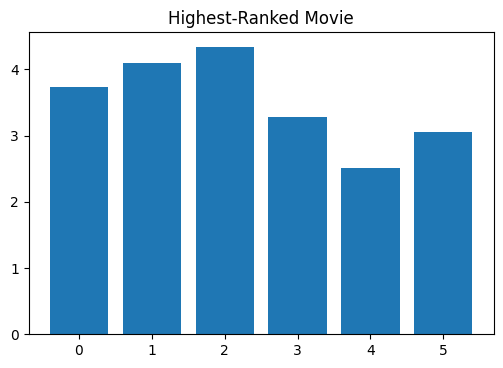

In [16]:
plt.bar(range(6), star_wars[star_wars.columns[9:15]].mean())
plt.title("Highest-Ranked Movie")
plt.show()

So far the following has been done 

- Cleanned and Mapped the Yes/No Columns
- Cleanned and Mapped Checkbox Columns
- Cleanned the Ranking Columns
- Found the Highest-Ranked Movie.

As I suspected, it looks like the "original" movies are rated much more highly than the newer ones, lower ranking are better!

# Finding the Most Viewed Movie

So far, The seen columns have been cleaned and their values have been converted to the Boolean type.

In [17]:
star_wars[star_wars.columns[3:9]].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

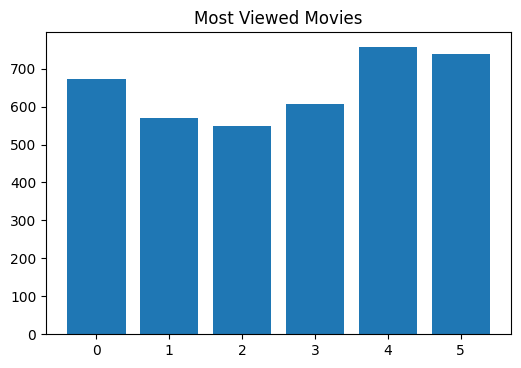

In [18]:
plt.bar(range(6), star_wars[star_wars.columns[3:9]].sum())
plt.title("Most Viewed Movies")
plt.show()

It appears that the original movies were seen by more respondents than the newer movies. This reaffrim the values in the  rankings, where the earlier movies seem to be more popular.

# Exploring the Data by Binary Segments

Since we know which movies the survey population as a whole has ranked the highest, now let's examine how certain segments of the survey population responded. There are several columns that segment our data into two groups. 

Here are a few examples:

- Do you consider yourself to be a fan of the Star Wars film franchise? — `True or False`
- Do you consider yourself to be a fan of the Star Trek franchise? — `Yes or No`
- Gender — `Male or Female`

In [19]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

In [20]:
males.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'ranking_1',
       'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],
   

In [21]:
#fan of the Star Wars film franchise
fan_Star_Wars_film_franchise = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == "True"]
Not_fan_Star_Wars_film_franchise = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == "False"]

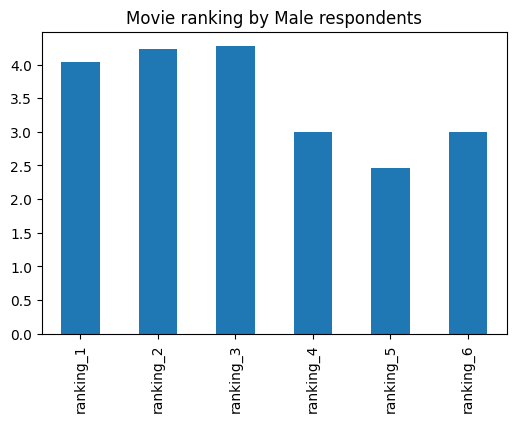

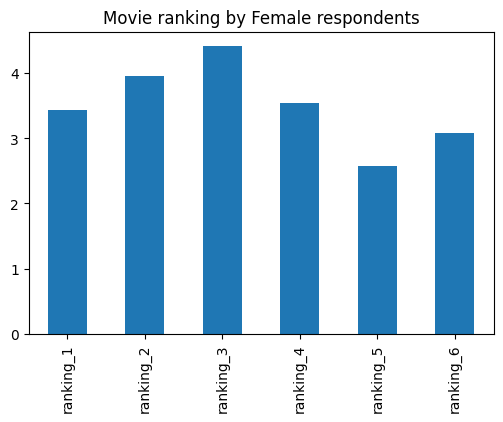

In [22]:
males[males.columns[9:15]].mean().plot(kind='bar')
plt.title("Movie ranking by Male respondents")
plt.show()

females[females.columns[9:15]].mean().plot(kind='bar')
plt.title("Movie ranking by Female respondents")
plt.show()

Most most viewed - Male respondents

 seen_1    361
seen_2    323
seen_3    317
seen_4    342
seen_5    392
seen_6    387
dtype: int64


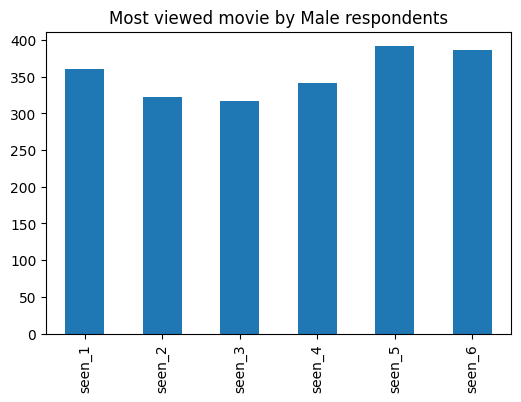

Most most viewed - Female respondents

 seen_1    298
seen_2    237
seen_3    222
seen_4    255
seen_5    353
seen_6    338
dtype: int64


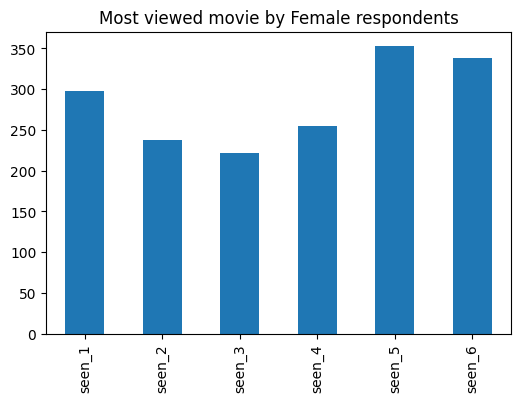

In [23]:
# Most most viewed - Male and plot the values
print("Most most viewed - Male respondents\n\n",males[males.columns[3:9]].sum())


males[males.columns[3:9]].sum().plot(kind='bar',title="Most viewed movie by Male respondents")
plt.show()

# Most most viewed - Female and plot the values
print("Most most viewed - Female respondents\n\n",females[females.columns[3:9]].sum())

females[females.columns[3:9]].sum().plot(kind='bar',title="Most viewed movie by Female respondents")
plt.show()

True     303
False    120
NaN       74
Name: fan_or_not, dtype: int64

after removing NaN values
 True     0.609658
False    0.390342
Name: fan_or_not, dtype: float64


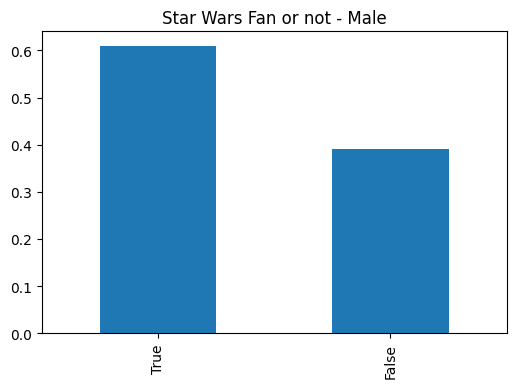

In [24]:
# rename the column in both male and female dataset we grouped in the previous step
male_fans = males.rename(columns={
        'Do you consider yourself to be a fan of the Star Wars film franchise?': "fan_or_not"})

# drop NaN values 
print(male_fans['fan_or_not'].value_counts(dropna=False))
male_fans['fan_or_not']= male_fans['fan_or_not'].fillna(False)
print('\nafter removing NaN values\n',male_fans['fan_or_not'].value_counts(dropna=False,normalize=True))
# plot values
male_fans['fan_or_not'].value_counts(dropna=False,normalize=True).plot(kind='bar', title='Star Wars Fan or not - Male')

plt.show()

True     238
False    159
NaN      152
Name: fan_or_not, dtype: int64

after removing NaN values
 False    0.566485
True     0.433515
Name: fan_or_not, dtype: float64


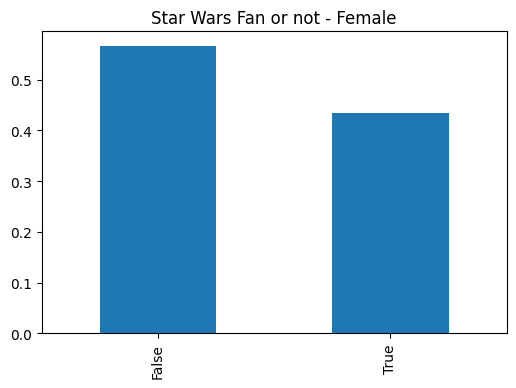

In [25]:
female_fans = females.rename(columns={
        'Do you consider yourself to be a fan of the Star Wars film franchise?': "fan_or_not"})

# drop NaN values 
print(female_fans['fan_or_not'].value_counts(dropna=False))
female_fans['fan_or_not']= female_fans['fan_or_not'].fillna(False)
print('\nafter removing NaN values\n',female_fans['fan_or_not'].value_counts(dropna=False,normalize=True))
# plot values
female_fans['fan_or_not'].value_counts(dropna=False,normalize=True).plot(kind='bar', title='Star Wars Fan or not - Female')

plt.show()

Male/Female differences in favorite Star Wars movie and most seen movie, more males watches episodes 1-3, but males liked them far less than females did.

Here are some potential next steps:

<ul>
    <li>Try to segment the data based on columns like Education, Location (Census Region), and Which character shot first?,</li>
    <li>which aren't binary. Are there any interesting patterns?</li>
    <li>Clean columns 15 to 29, which contain data on the characters respondents view favorably and unfavorably.</li>
    <li>Which character do respondents like the most?</li>
    <li>Which character do respondents dislike the most?</li>
    <li>Which character is the most controversial (split between likes and dislikes)?</li>
</ul>

## Let's look at Education 

In [26]:
star_wars['Education'].value_counts()

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

In [27]:
graduate = star_wars[star_wars['Education'] == 'Graduate degree']

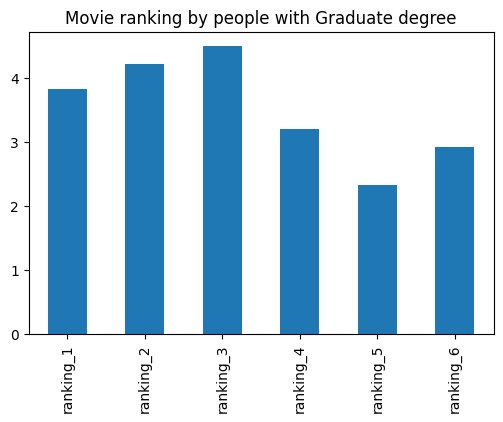

In [28]:
graduate.iloc[:,9:15].mean().plot.bar()
plt.title("Movie ranking by people with Graduate degree")
plt.show()

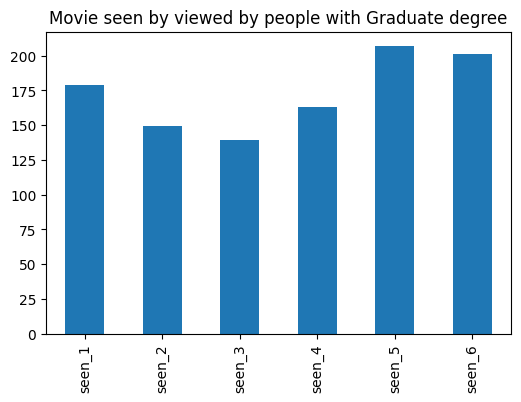

In [29]:
graduate.iloc[:,3:9].sum().plot.bar()
plt.title("Movie seen by viewed by people with Graduate degree")
plt.show()

In [30]:
Bachelor = star_wars[star_wars['Education'] == 'Bachelor degree']

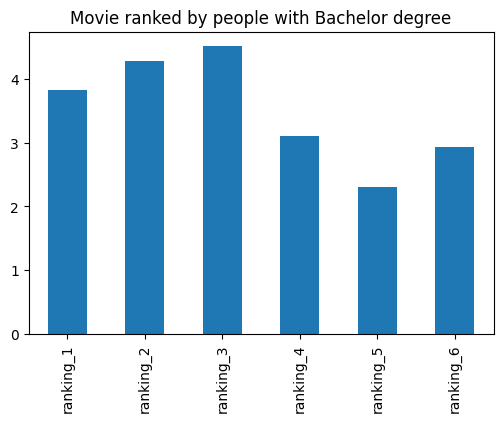

In [31]:
Bachelor.iloc[:,9:15].mean().plot.bar()
plt.title("Movie ranked by people with Bachelor degree")
plt.show()

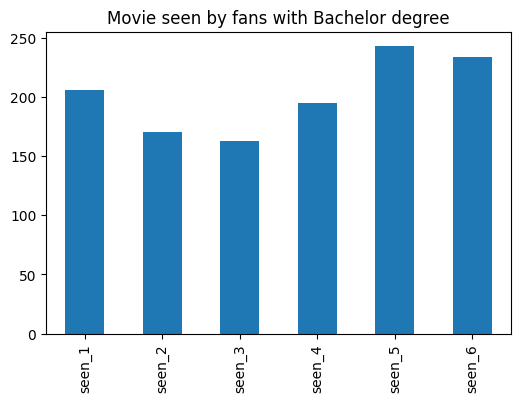

In [32]:
Bachelor.iloc[:,3:9].sum().plot.bar()
plt.title("Movie seen by fans with Bachelor degree")
plt.show()

In [33]:
Some_college_Associate_degree = star_wars[star_wars['Education'] == 'Some college or Associate degree']

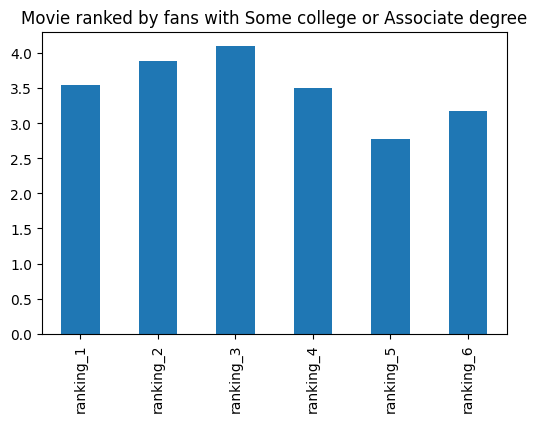

In [34]:
Some_college_Associate_degree.iloc[:,9:15].mean().plot.bar()
plt.title("Movie ranked by fans with Some college or Associate degree")
plt.show()

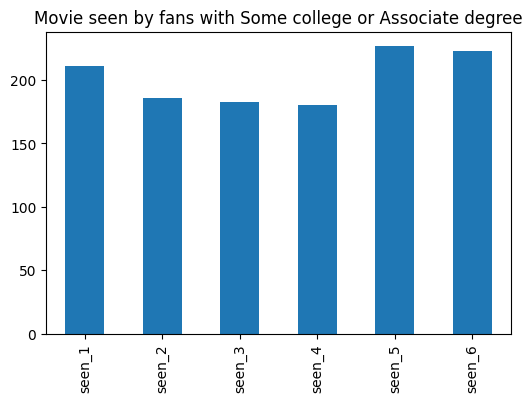

In [35]:
Some_college_Associate_degree.iloc[:,3:9].sum().plot.bar()
plt.title("Movie seen by fans with Some college or Associate degree")
plt.show()

In [36]:
High_school_degree = star_wars[star_wars['Education'] == 'High school degree']

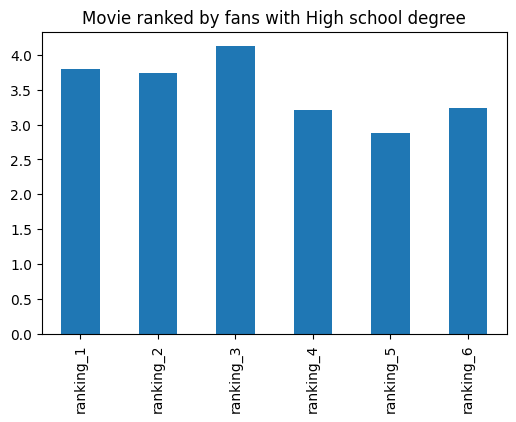

In [37]:
High_school_degree.iloc[:,9:15].mean().plot.bar()
plt.title("Movie ranked by fans with High school degree")
plt.show()

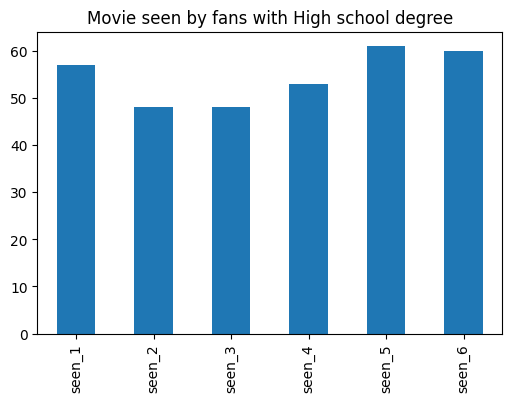

In [38]:
High_school_degree.iloc[:,3:9].sum().plot.bar()
plt.title("Movie seen by fans with High school degree")
plt.show()

## Let's look at Location (Census Region)

East North Central    181
Pacific               175
South Atlantic        170
Middle Atlantic       122
West South Central    110
West North Central     93
Mountain               79
New England            75
East South Central     38
Name: Location (Census Region), dtype: int64


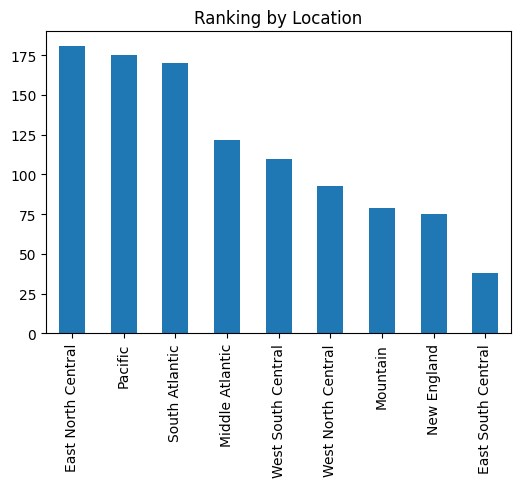

In [39]:
Location = star_wars['Location (Census Region)'].value_counts()
print(Location)

Location.plot.bar(title='Ranking by Location')
plt.show()

Let us figure out the region that see the most Star Wars movies

In [40]:
star_wars['Total_View'] = star_wars['seen_1']*1+star_wars['seen_2']*1+star_wars['seen_3']*1+star_wars['seen_4']*1+star_wars['seen_5']*1+star_wars['seen_6']*1

In [41]:
star_wars.groupby('Location (Census Region)').sum()['Total_View'].sort_values(ascending = False)

Location (Census Region)
Pacific               663
East North Central    624
South Atlantic        603
Middle Atlantic       462
West South Central    358
West North Central    340
Mountain              324
New England           294
East South Central    153
Name: Total_View, dtype: int64

So the Pacific region sees the most Star Wars movies and the East South Central sees the least Star Wars movies.

Now let's look at columns 15 to 29

In [42]:
star_wars.iloc[:,15:29].head()

Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.  \
0                                     Very favorably                                                               
1                                                NaN                                                               
2                                 Somewhat favorably                                                               
3                                     Very favorably                                                               
4                                     Very favorably                                                               

          Unnamed: 16         Unnamed: 17           Unnamed: 18  \
0      Very favorably      Very favorably        Very favorably   
1                 NaN                 NaN                   NaN   
2  Somewhat favorably  Somewhat favorably    Somewhat favorably   
3      Very favorably      Very favorably        Very favorably   
4  Somewhat favorably  Somewhat favorably  Somewhat unfavorably   

          Unnamed: 19         Unnamed: 20         Unnamed: 21  \
0      Very favorably      Very favorably      Very favorably   
1                 NaN                 NaN                 NaN   
2  Somewhat favorably    Unfamiliar (N/A)    Unfamiliar (N/A)   
3      Very favorably  Somewhat favorably      Very favorably   
4      Very favorably    Very unfavorably  Somewhat favorably   

                                   Unnamed: 22           Unnamed: 23  \
0                             Unfamiliar (N/A)      Unfamiliar (N/A)   
1                                          NaN                   NaN   
2                             Unfamiliar (N/A)      Unfamiliar (N/A)   
3                           Somewhat favorably  Somewhat unfavorably   
4  Neither favorably nor unfavorably (neutral)        Very favorably   

          Unnamed: 24         Unnamed: 25       Unnamed: 26  \
0      Very favorably      Very favorably    Very favorably   
1                 NaN                 NaN               NaN   
2    Unfamiliar (N/A)    Unfamiliar (N/A)  Unfamiliar (N/A)   
3      Very favorably      Very favorably    Very favorably   
4  Somewhat favorably  Somewhat favorably  Very unfavorably   

          Unnamed: 27         Unnamed: 28  
0      Very favorably      Very favorably  
1                 NaN                 NaN  
2    Unfamiliar (N/A)    Unfamiliar (N/A)  
3      Very favorably      Very favorably  
4  Somewhat favorably  Somewhat favorably

In [43]:
#Let's look at the column names
star_wars.columns[15:29]

Index(['Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28'],
      dtype='object')

In [44]:
star_wars['Which character shot first?'].value_counts()

Han                                 325
I don't understand this question    306
Greedo                              197
Name: Which character shot first?, dtype: int64

From the dataset we have

- 'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her. - Han Solo
- Unnamed: 16 - Luke Skywalker
- Unnamed: 17 -Princess Leia Organa
- Unnamed: 18 -Anakin Skywalker
- Unnamed: 19 -Obi Wan Kenobi
- Unnamed: 20 -Emperor Palpatine
- Unnamed: 21 -Darth Vader
- Unnamed: 22 -Lando Calrissian
- Unnamed: 23 -Boba Fett
- Unnamed: 24 -C-3P0
- Unnamed: 25 -R2D2
- Unnamed: 26 -Jar Jar Binks
- Unnamed: 27 -Padme Amidala
- Unnamed: 28 - Yoda

Let's rename the columns to character names

In [45]:
star_wars = star_wars.rename(columns = {'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.':'Han_Solo',
                                        'Unnamed: 16':'Luke_Skywalker',
                                         'Unnamed: 17': 'Princess_Leia',
                                         'Unnamed: 18':'Anakin_Skywalker',
                                         'Unnamed: 19':'Obi_Wan_Kenobi',
                                         'Unnamed: 20':'Emperor_Palpatine',
                                          'Unnamed: 21':'Darth_Vader',
                                          'Unnamed: 22':'Lando',
                                          'Unnamed: 23':'Boba',
                                          'Unnamed: 24':'C3P0',
                                         'Unnamed: 25':'R2D2',
                                          'Unnamed: 26':'Jar_Jar',
                                          'Unnamed: 27':'Padme',
                                          'Unnamed: 28':'Yoda'})

In [46]:
star_wars.iloc[:,15:29].head()

Han_Solo      Luke_Skywalker       Princess_Leia  \
0      Very favorably      Very favorably      Very favorably   
1                 NaN                 NaN                 NaN   
2  Somewhat favorably  Somewhat favorably  Somewhat favorably   
3      Very favorably      Very favorably      Very favorably   
4      Very favorably  Somewhat favorably  Somewhat favorably   

       Anakin_Skywalker      Obi_Wan_Kenobi   Emperor_Palpatine  \
0        Very favorably      Very favorably      Very favorably   
1                   NaN                 NaN                 NaN   
2    Somewhat favorably  Somewhat favorably    Unfamiliar (N/A)   
3        Very favorably      Very favorably  Somewhat favorably   
4  Somewhat unfavorably      Very favorably    Very unfavorably   

          Darth_Vader                                        Lando  \
0      Very favorably                             Unfamiliar (N/A)   
1                 NaN                                          NaN   
2    Unfamiliar (N/A)                             Unfamiliar (N/A)   
3      Very favorably                           Somewhat favorably   
4  Somewhat favorably  Neither favorably nor unfavorably (neutral)   

                   Boba                C3P0                R2D2  \
0      Unfamiliar (N/A)      Very favorably      Very favorably   
1                   NaN                 NaN                 NaN   
2      Unfamiliar (N/A)    Unfamiliar (N/A)    Unfamiliar (N/A)   
3  Somewhat unfavorably      Very favorably      Very favorably   
4        Very favorably  Somewhat favorably  Somewhat favorably   

            Jar_Jar               Padme                Yoda  
0    Very favorably      Very favorably      Very favorably  
1               NaN                 NaN                 NaN  
2  Unfamiliar (N/A)    Unfamiliar (N/A)    Unfamiliar (N/A)  
3    Very favorably      Very favorably      Very favorably  
4  Very unfavorably  Somewhat favorably  Somewhat favorably

In [47]:
star_wars['Han_Solo'].value_counts()

Very favorably                                 610
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: Han_Solo, dtype: int64

Let's convert these ratings to number: 1 being most favorite, and 6 being least favorite

In [48]:
favor_map = {'Very favorably':1,'Somewhat favorably':2,
            'Neither favorably nor unfavorably (neutral)': 3,
            'Unfamiliar (N/A)':4,
             'Somewhat unfavorably': 5,
             'Very unfavorably': 6}

In [49]:
for i in list(range(15,29)):
    star_wars.iloc[:, i] = star_wars.iloc[:,i].map(favor_map)

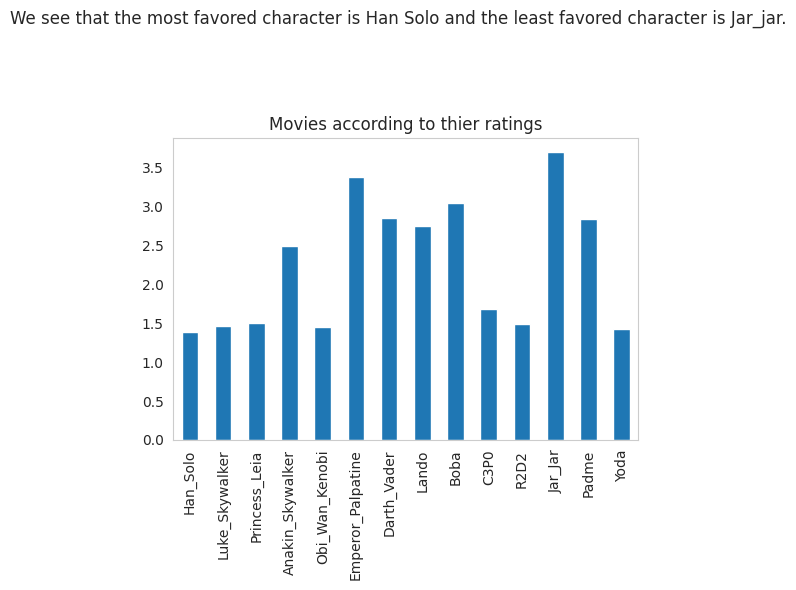

In [75]:
star_wars.iloc[:,15:29].mean().plot.bar()
plt.title('Movies according to thier ratings')
plt.suptitle(x=0.5,y=1.2,
             t='We see that the most favored character is Han Solo and the least favored character is Jar_jar.')
plt.show()

##  Views and Ranks based on age group

In [52]:
star_wars['Age'].value_counts(normalize=True)

45-60    0.278203
> 60     0.257170
30-44    0.256214
18-29    0.208413
Name: Age, dtype: float64

         seen_1    seen_2    seen_3    seen_4    seen_5    seen_6
Age                                                              
18-29  0.733945  0.678899  0.665138  0.697248  0.733945  0.733945
30-44  0.652985  0.589552  0.567164  0.656716  0.735075  0.735075
45-60  0.621993  0.508591  0.487973  0.567010  0.756014  0.721649
> 60   0.531599  0.394052  0.371747  0.386617  0.624535  0.587361


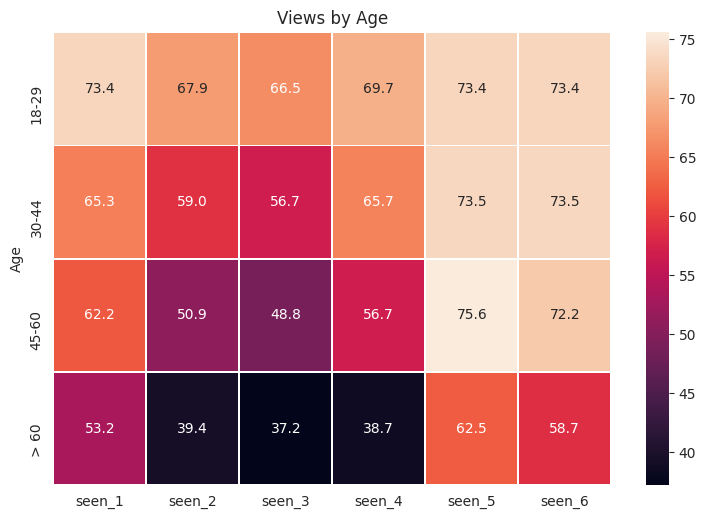

In [57]:
# views by age
views_by_age =  star_wars.pivot_table(index="Age", values=star_wars.columns[3:9]) 
print(views_by_age)


f, ax = plt.subplots(figsize=(9, 6))

sns.heatmap(views_by_age*100, annot=True,fmt='.1f' ,linewidths=.5, ax=ax)
ax.set_title('Views by Age')
plt.show()

It can be seen that roughly 66 percent of viewers between the ages of 18 and 29 watched all the episodes, and 73.4% of them watched episode 5. The figures also showed that viewers over the age of 60 watched the least amount of the series, but 62.5 percent of them watched episode 5, which has the highest ratings in this age group.

When compared to other episodes in the series, Episode 5 clearly received the most attention from all viewers, with more than 73 percent of viewers in the 18 to 29 year old, 30-44 year old, and 45 to 60 year old age brackets watching it.

       ranking_1  ranking_2  ranking_3  ranking_4  ranking_5  ranking_6
Age                                                                    
18-29   4.100000   4.100000   3.966667   2.994444   2.722222   3.116667
30-44   4.347826   4.309179   4.475728   2.932367   2.212560   2.714976
45-60   3.541667   4.170833   4.537500   3.308333   2.437500   3.004167
> 60    3.010417   3.761658   4.316062   3.808290   2.730570   3.357513


Text(0.5, 1.0, 'Rankings by Age')

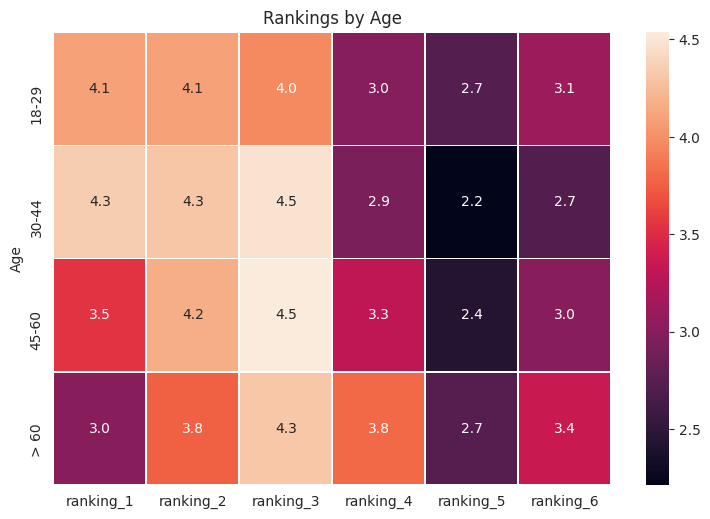

In [58]:
# rankings by age
ranks_by_age =  star_wars.pivot_table(index="Age", values=star_wars.columns[9:15]) 
print(ranks_by_age)



f, ax = plt.subplots(figsize=(9, 6))

sns.heatmap(ranks_by_age, annot=True,fmt='.1f' ,linewidths=.5, ax=ax)
ax.set_title('Rankings by Age')

### Conclusion

With an average rating of 2.5, episode 5 is undoubtedly the highest rated film across all age groups.


It is clear from the analysis of the 835 survey responses that Star Wars: The Empire Strikes Back is the best of the Star Wars franchise's episodes. Not only was it the most watched movie, but it also had the best ratings of any episode. We also discovered that more men than women were fans of the Star Wars films.